# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
TRAIN = False
EXPLORE = True

Ready to train E20 over 16 training sets for 20001 episodes each, with fixed params:
    Max episodes  =  20001
    Batch size    =  1000
    Bad step prob =  0.01
    Noise decay   =  1.0
    Noise scale   =  0.001
    Weight decay  =  1e-05
    Gamma         =  0.99
    Tau           =  0.001

///// Beginning training set  E20.01  with:
      LR actor         =  0.001
      LR critic        =  0.0001
      Learning every      20  time steps
      Learn iterations =  1
      Seed             =  468
1000	Average score:   0.000,        mem:   1061/     0 ( 0.0%), avg 1534.6 eps/min;  0.2 hr rem   
2000	Average score:   0.007,        mem:   1230/    16 ( 1.3%), avg 1540.2 eps/min;  0.2 hr rem   
3000	Average score:   0.000,        mem:   1382/    17 ( 1.2%), avg 1585.3 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1543/    17 ( 1.1%), avg 1617.3 eps/min;  0.2 hr rem   
5000	Average score:   0.000,        mem:   1681/    17 ( 1.0%), avg 1616.4 eps/min;  0.2 hr rem   


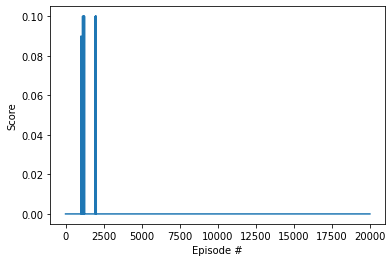


///// Beginning training set  E20.02  with:
      LR actor         =  0.001
      LR critic        =  0.0001
      Learning every      20  time steps
      Learn iterations =  1
      Seed             =  44939
1000	Average score:   0.000,        mem:   1077/    21 ( 1.9%), avg 1635.0 eps/min;  0.2 hr rem   
2000	Average score:   0.000,        mem:   1193/    21 ( 1.8%), avg 1636.1 eps/min;  0.2 hr rem   
3000	Average score:   0.000,        mem:   1325/    21 ( 1.6%), avg 1632.8 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1471/    21 ( 1.4%), avg 1625.0 eps/min;  0.2 hr rem   
5000	Average score:   0.000,        mem:   1598/    21 ( 1.3%), avg 1612.0 eps/min;  0.2 hr rem   
6000	Average score:   0.000,        mem:   1764/    21 ( 1.2%), avg 1607.9 eps/min;  0.1 hr rem   
7000	Average score:   0.000,        mem:   1925/    21 ( 1.1%), avg 1598.3 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:   2053/    21 ( 1.0%), avg 1586.4 eps/min;  0.1 hr rem 

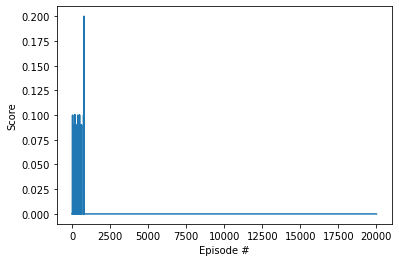


///// Beginning training set  E20.03  with:
      LR actor         =  0.001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  468
1000	Average score:   0.000,        mem:   1055/     4 ( 0.4%), avg 1650.9 eps/min;  0.2 hr rem   
2000	Average score:   0.000,        mem:   1192/     4 ( 0.3%), avg 1658.3 eps/min;  0.2 hr rem   
3000	Average score:   0.000,        mem:   1346/     4 ( 0.3%), avg 1670.6 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1493/     4 ( 0.3%), avg 1683.6 eps/min;  0.2 hr rem   
5000	Average score:   0.000,        mem:   1635/     4 ( 0.2%), avg 1691.5 eps/min;  0.1 hr rem   
6000	Average score:   0.000,        mem:   1798/     4 ( 0.2%), avg 1689.9 eps/min;  0.1 hr rem   
7000	Average score:   0.000,        mem:   1917/     4 ( 0.2%), avg 1637.6 eps/min;  0.1 hr rem   
7524	Running avg/max: 0.000/0.000,  mem:   1988/     4 ( 0.2%), avg 1636.9 eps/min   

In [ ]:
# This cell will explore several combinations of hyperparams by training all of them

TIME_STEPS = 200
SAVE_ANALYSIS = False

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX     = "E20"
    EPISODES       = 20001
    BATCH          = 1000
    BAD_STEP_PROB  = 0.01
    NOISE_DECAY    = 1.0 #need to test 0.99999; 0.9999 is too small
    NOISE_SCALE    = 0.001
    WEIGHT_DECAY   = 1.0e-5
    GAMMA          = 0.99
    TAU            = 0.001
    
    # session loop variables:
    SEEDS          = (468, 44939) #(0, 111, 468, 5555, 23100, 44939)
    LR_ACTORS      = (0.001, 0.0001)
    LR_CRITICS     = (0.0001, 0.00001)
    LEARN_EVERYS   = (20, 100,)
    LEARN_ITERS    = (1,)
    
    
    num_sets = len(LR_ACTORS) * len(LR_CRITICS) * len(SEEDS) * len(LEARN_EVERYS) * len(LEARN_ITERS)
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, num_sets, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Batch size    = ", BATCH)
    print("    Bad step prob = ", BAD_STEP_PROB)
    print("    Noise decay   = ", NOISE_DECAY)
    print("    Noise scale   = ", NOISE_SCALE)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Tau           = ", TAU)
    
    set_id = 0
    for LR_ACTOR in LR_ACTORS:
        for LR_CRITIC in LR_CRITICS:
            for LEARN_EVERY in LEARN_EVERYS:
                for LEARN_ITER in LEARN_ITERS:
                    for SEED in SEEDS:
                        
                        # set the replay buffer size to that it fills after ~5000 bad episodes
                        # (at ~14 experiences/episode), based on the bad step retention rate
                        buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
                        
                        set_id += 1
                        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
                        print("\n///// Beginning training set ", RUN_NAME, " with:")
                        print("      LR actor         = ", LR_ACTOR)
                        print("      LR critic        = ", LR_CRITIC)
                        print("      Learning every     ", LEARN_EVERY, " time steps")
                        print("      Learn iterations = ", LEARN_ITER)
                        print("      Seed             = ", SEED)
    
                        ##### instantiate the agents and perform the training

                        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                                        noise_decay=NOISE_DECAY, learn_every=LEARN_EVERY, 
                                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, 
                                        noise_scale=NOISE_SCALE, tau=TAU)

                        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                                       winning_score=0.5, max_time_steps=TIME_STEPS,
                                       checkpoint_interval=1000)

                        ##### plot the training reward history

                        fig = plt.figure()
                        ax = fig.add_subplot(111)
                        plt.plot(np.arange(len(scores)), scores)
                        plt.ylabel('Score')
                        plt.xlabel('Episode #')
                        plt.show()
                        
                        ##### store the action/noise data, if being used
                        
                        if SAVE_ANALYSIS:
                            maddpg.save_anal_data(RUN_PREFIX)
                        
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

When finished, you can close the environment.

In [ ]:
env.close()